In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
%matplotlib inline

# SVM

<p>SVM (Support Vector Machine), метод опорных векторов - один из представителей линейных алгоритмов, целью которого является постороение наиболее широкой разделяющей гиперплоскости для задачи классификации</p>
<p>Почему необходимо строить максимально широкую разделяющую поверхность, рассмотрим пример задачи классификации, какая из разделяющих линий является оптимальной?</p>
<img src="./img/classification.png">
<p>Логически кажется, что линия находящаяся посередине между классами является оптимальной, именно такая линия и порождается при максимизации ширины разделяющей полосы</p>
<img src="./img/classification_optimal.png">
<p>Рассмотрим решение задачи в случае, линейно разделимой выборки, наша цель постороить разделяющую поверхность</p>
<p><center>$$\large{wx-b=0}$$</center></p>
<p>Вектор $\overrightarrow{w}$ перпендикулярен, данной плоскости а $\large{\frac{b}{||w||}}$ - расстояние от гиперплоскости до начала координат</p>
<p>Поскольку нас интересуют гиперплоскости на границах нашей разделяющей полосы, параллельные разделяющей поверхности, то можно доказать что они равны:</p>
<p><center>$$\large{wx-b=1}$$</center></p>
<p><center>$$\large{wx-b=-1}$$</center></p>
<p>Для положительного и отрицательного класса соотвественнно</p>
<p>Расстояние от начала координат то этих плоскостей будет равно $\large{\frac{b-1}{||w||}}$ и $\large{\frac{b+1}{||w||}}$, тогда ширина данной полосы равна $\large{\frac{2}{||w||}}$</p>
<p>Таким образом наша задача минимизировать ||w|| чтобы получить полосу оптимальной ширины</p>

In [2]:
plt.style.use('seaborn')

In [3]:
np.random.seed(0)

In [4]:
data, target = make_classification(1000, 2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=5)

In [5]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

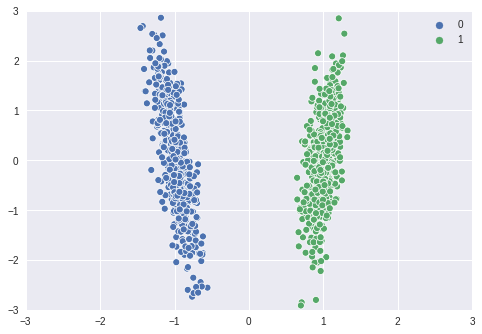

In [6]:
sns.scatterplot(data[:, 0], data[:, 1], target);
plt.xlim(-3, 3);
plt.ylim(-3, 3);

In [7]:
lr1 = Ridge(fit_intercept=True)
lr1.fit(data, target)
lr2 = LogisticRegression(fit_intercept=True)
lr2.fit(data, target)
lr3 = SVC(kernel='linear')
lr3.fit(data, target)

/home/imd/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

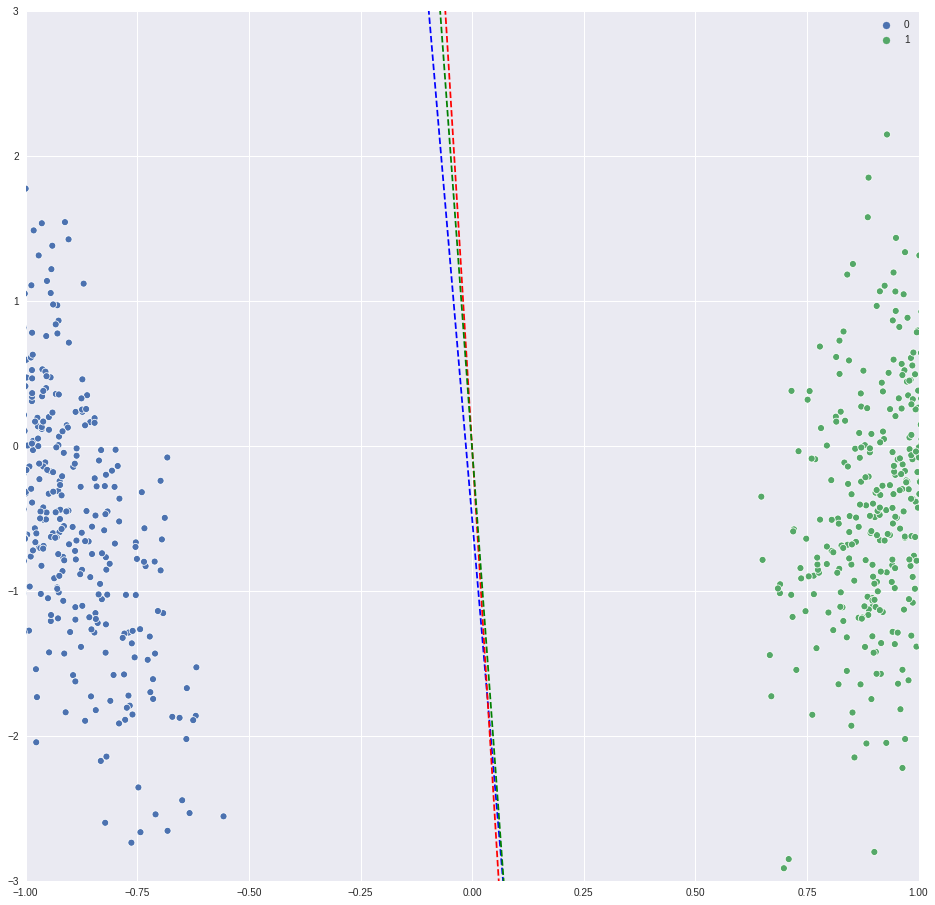

In [8]:
plt.figure(figsize=(16, 16));
sns.scatterplot(data[:, 0], data[:, 1], target);
plt.plot(np.arange(-1.5, 2), -np.arange(-1.5, 2)*lr1.coef_[0]/lr1.coef_[1] - lr1.intercept_, 
         color='blue', linestyle='--');
plt.plot(np.arange(-1.5, 2), -np.arange(-1.5, 2)*lr2.coef_[0, 0]/lr2.coef_[0, 1] - lr2.intercept_[0], 
         color='red', linestyle='--');
plt.plot(np.arange(-1.5, 2), -np.arange(-1.5, 2)*lr3.coef_[0, 0]/lr3.coef_[0, 1] - lr3.intercept_[0], 
         color='green', linestyle='--');
plt.xlim(-1, 1);
plt.ylim(-3, 3);